In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [2]:
train = pd.read_csv('train.csv')

In [7]:
use_col = [x for x in train.columns if x != "Survived"]
X = train[use_col]
y = train.Survived

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [10]:
X_test.shape

(179, 11)

In [11]:
# ベースライン（男女で分類）
baseline = X_test["Sex"].map({'female': 1, 'male': 0})

In [12]:
accuracy_score(y_test, baseline)

0.776536312849162

<AxesSubplot:xlabel='Sex', ylabel='count'>

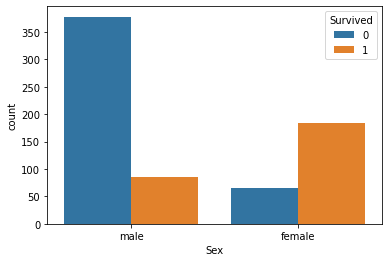

In [14]:
sns.countplot(x=X_train["Sex"], hue=y_train)

この状態からルールベースで女性で0、男性で1の人を分類する方法を見つけたい

In [52]:
# 女性でなくなっているのは２０〜３０代でEmbarkedがS,Q, thirdfloor
# 男性で1 -> 10歳以下
tmp = pd.concat([train['PassengerId'], X_test[(X_test['Sex']=='female') & (X_test['Age']<40) & (X_test['Age']>=20)].loc[:,'Pclass'].map({3: 0})], axis=1)


In [77]:
X_test['y_pred'] = np.zeros((len(X_test), 1))

<ipython-input-77-6cdfbc4cc9f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['y_pred'] = np.zeros((len(X_test), 1))


In [78]:
X_test[(X_test['Sex']=='female') & (X_test['Age']<40) & (X_test['Age']>=20) & (X_test['Pclass']==3)].loc[:,'y_pred'] = 0


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [79]:
train['y_pred'].value_counts()

0.0    891
Name: y_pred, dtype: int64

In [55]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,y_pred
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,<built-in function zeros>
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,<built-in function zeros>
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,<built-in function zeros>
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,<built-in function zeros>
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,<built-in function zeros>


In [46]:
X_test.drop('y_pred', axis=1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
862,863,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
223,224,3,"Nenkoff, Mr. Christo",male,NaN,0,0,349234,7.8958,NaN,S
84,85,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.5000,NaN,S
680,681,3,"Peters, Miss. Katie",female,NaN,0,0,330935,8.1375,NaN,Q
535,536,2,"Hart, Miss. Eva Miriam",female,7.0,0,2,F.C.C. 13529,26.2500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
796,797,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S
815,816,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0000,B102,S
629,630,3,"O'Connell, Mr. Patrick D",male,NaN,0,0,334912,7.7333,NaN,Q
421,422,3,"Charters, Mr. David",male,21.0,0,0,A/5. 13032,7.7333,NaN,Q


In [41]:
X_test['y_pred'] = X_test[(X_test['Sex']=='female') & ~((X_test['Age']<40) & (X_test['Age']>=20))]['Pclass'].map({2:1, 1:1})


<ipython-input-41-d8ad4494ccd9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['y_pred'] = X_test[(X_test['Sex']=='female') & ~((X_test['Age']<40) & (X_test['Age']>=20))]['Pclass'].map({2:1, 1:1})


In [42]:
X_test.head(40)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,y_pred
862,863,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S,1.0
223,224,3,"Nenkoff, Mr. Christo",male,NaN,0,0,349234,7.8958,NaN,S,NaN
84,85,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.5000,NaN,S,1.0
680,681,3,"Peters, Miss. Katie",female,NaN,0,0,330935,8.1375,NaN,Q,NaN
535,536,2,"Hart, Miss. Eva Miriam",female,7.0,0,2,F.C.C. 13529,26.2500,NaN,S,1.0
623,624,3,"Hansen, Mr. Henry Damsgaard",male,21.0,0,0,350029,7.8542,NaN,S,NaN
148,149,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.5,0,2,230080,26.0000,F2,S,NaN
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN
34,35,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C,NaN
241,242,3,"Murphy, Miss. Katherine ""Kate""",female,NaN,1,0,367230,15.5000,NaN,Q,NaN


In [ ]:
!